# Import Dataset from kaggle 

In [2]:
! pip install kaggle api

In [3]:
import os
os.chmod(r"C:\Users\janvi\.kaggle\kaggle.json", 600)


In [4]:
!kaggle datasets download -d himanshunakrani/iris-dataset


Dataset URL: https://www.kaggle.com/datasets/himanshunakrani/iris-dataset
License(s): CC0-1.0
iris-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
with zipfile.ZipFile("iris-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("iris_dataset")


# Import Libraries and Load Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
df = pd.read_csv("iris_dataset/Iris.csv")

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [10]:
print(df.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [11]:
# Step 3: Prepare features and labels
X = df.drop('species', axis=1)  # features
y = df['species']               # target

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature scaling for KNN and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Decision Tree

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# K-Nearest Neighbors

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Logistic Regression

In [17]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Compare accuracies

C:\Users\janvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


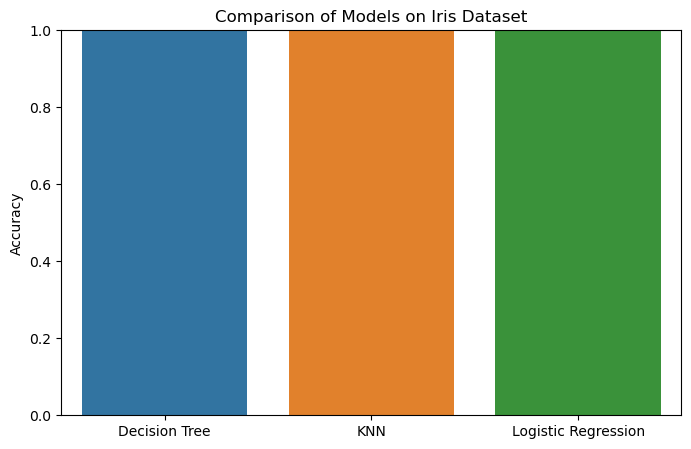

In [19]:
# Accuracy comparison
models = ['Decision Tree', 'KNN', 'Logistic Regression']
accuracies = [acc_dt, acc_knn, acc_lr]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Comparison of Models on Iris Dataset")
plt.show()


# Confusion matrices

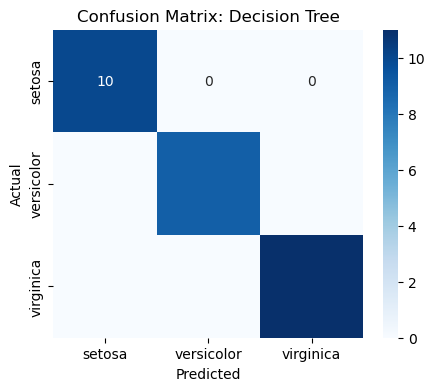

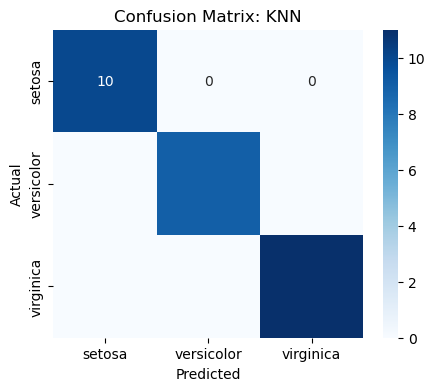

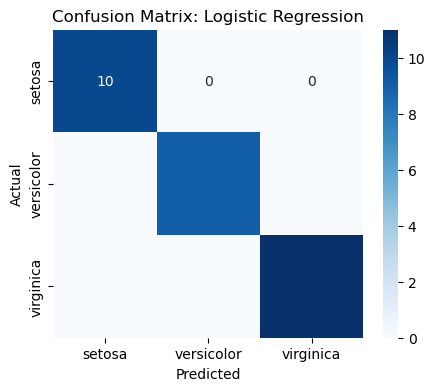

In [21]:
# Function to plot confusion matrix
def plot_cm(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Plot for each model
plot_cm(y_test, y_pred_dt, "Decision Tree")
plot_cm(y_test, y_pred_knn, "KNN")
plot_cm(y_test, y_pred_lr, "Logistic Regression")


In [22]:
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("KNN:\n", classification_report(y_test, y_pred_knn))
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Decision Tree:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

KNN:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.